In [1]:
import pandas as pd

df = pd.read_csv('/content/uber.csv')
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [4]:
# Step 1 - Finding Missing values and dealing with them using dropna() method

df.isnull().sum()

df_cleaned = df.dropna()

print("Size before removing missing values : ", df.shape)
print("Size After removing missing values : ", df_cleaned.shape)

df_cleaned.isnull().sum()

Size before removing missing values :  (200000, 9)
Size After removing missing values :  (199999, 9)


,0
Unnamed: 0,0
key,0
fare_amount,0
pickup_datetime,0
pickup_longitude,0
pickup_latitude,0
dropoff_longitude,0
dropoff_latitude,0
passenger_count,0


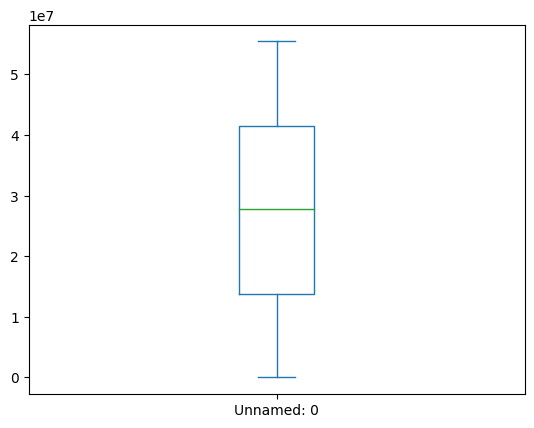

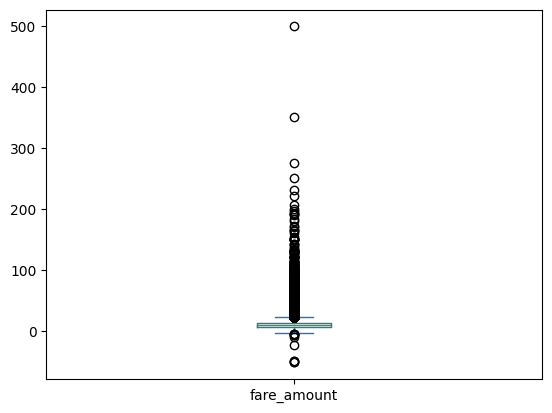

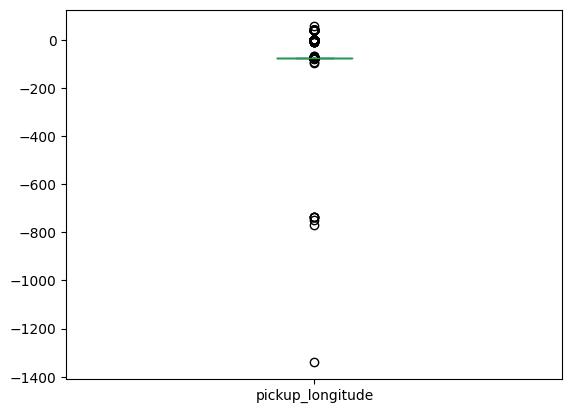

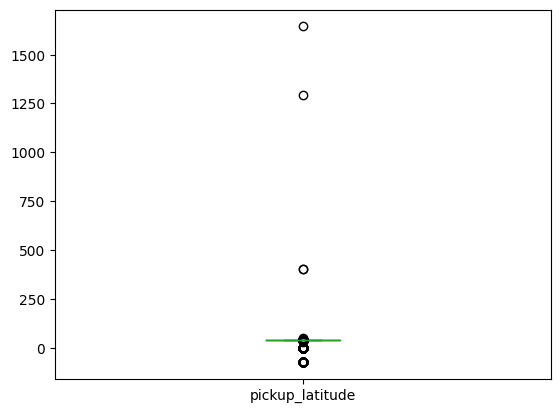

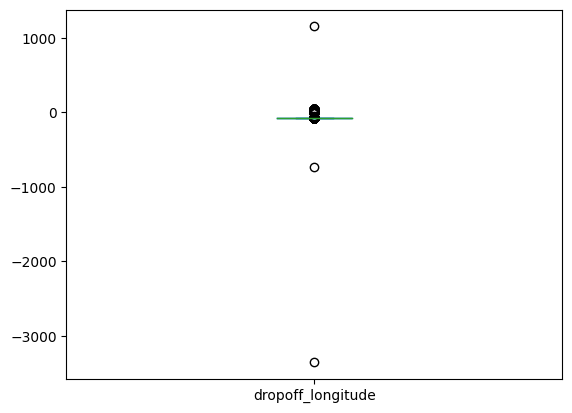

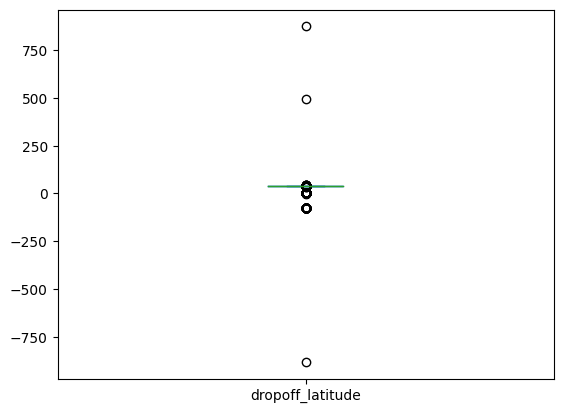

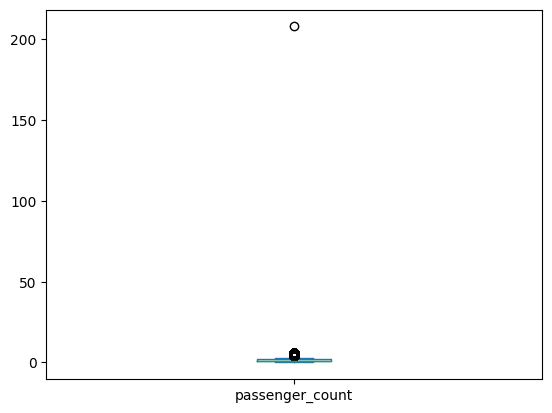

(199999, 9)

In [9]:
# Step-2 Identifying Outliers and removing them using box plot method

import matplotlib.pyplot as plt

def Identify_outliers(df_cleaned):
  for column in df_cleaned.select_dtypes(include='number').columns:
    df[column].plot(kind='box')
    plt.show()

Identify_outliers(df_cleaned)

df_cleaned.shape

In [11]:
def remove_outliers(df_cleaned):
  for column in df_cleaned.select_dtypes(include='number').columns:
    Q1=df_cleaned[column].quantile(0.25)
    Q3=df_cleaned[column].quantile(0.75)

    IQR = Q3-Q1

    lower_bound = Q1 - 1.5*IQR
    Upper_bound = Q3 + 1.5*IQR

    df_no_outliers = df_cleaned[(df_cleaned[column]>=lower_bound) & (df_cleaned[column]<=Upper_bound) ]

  return df_no_outliers

df_no_outliers = remove_outliers(df_cleaned)

df_no_outliers.shape

(177442, 9)

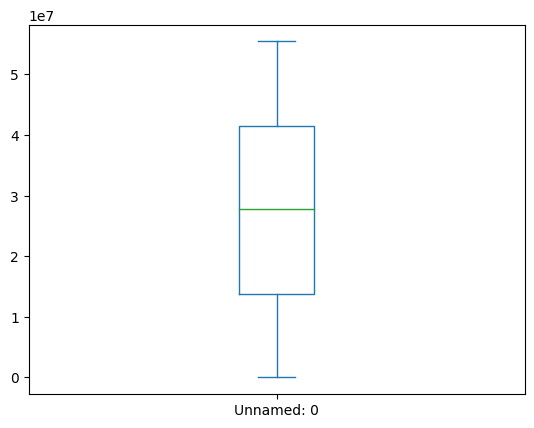

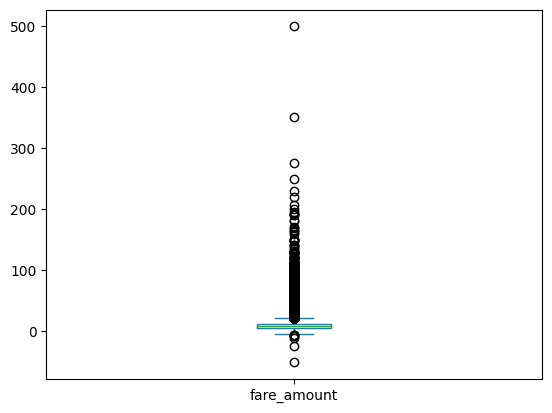

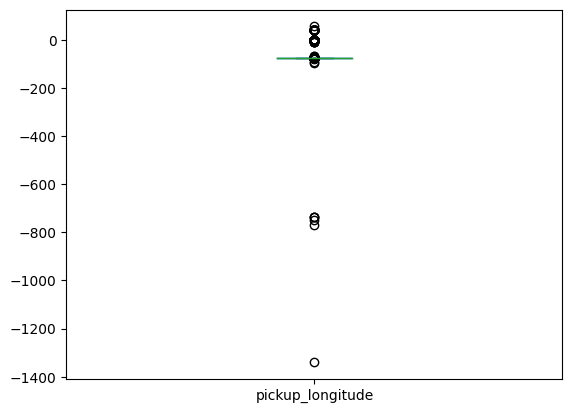

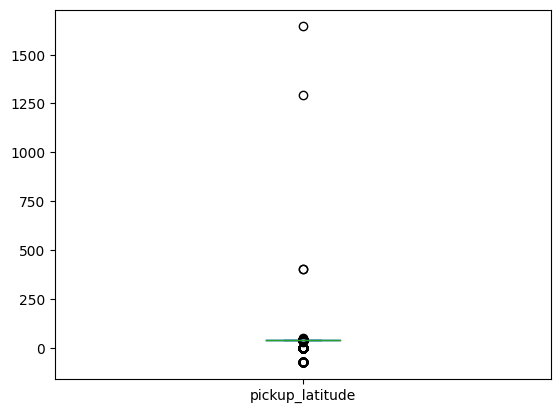

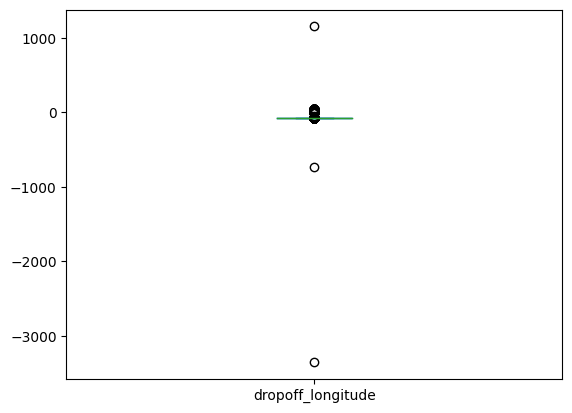

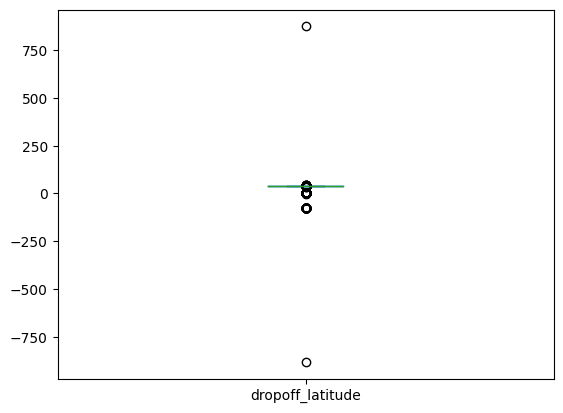

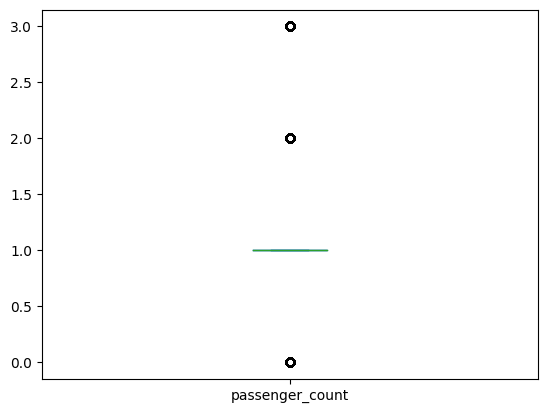

(177442, 9)

In [13]:
# checking whether all outliers are removed or not
import matplotlib.pyplot as plt

def check_outliers(df):
  for column in df.select_dtypes(include = 'number').columns:
    df[column].plot(kind='box')
    plt.show()
    print()

check_outliers(df_no_outliers)

In [15]:
print("original DataFrame :",df.shape)
print("No missing values DataFrame :",df_cleaned.shape)
print("No outliers DataFrame :",df_no_outliers.shape)

original DataFrame : (200000, 9)
No missing values DataFrame : (199999, 9)
No outliers DataFrame : (177442, 9)


In [16]:
# Step 3 - Finding Corelation

df_no_outliers.select_dtypes(include='number').corr()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
Unnamed: 0,1.000000,0.000829,0.000944,-0.000623,0.000563,-0.000137,0.001795
fare_amount,0.000829,1.000000,0.010532,-0.008594,0.009163,-0.011683,0.017283
pickup_longitude,0.000944,0.010532,1.000000,-0.810002,0.829918,-0.854943,-0.000959
pickup_latitude,-0.000623,-0.008594,-0.810002,1.000000,-0.761785,0.684695,0.000519
dropoff_longitude,0.000563,0.009163,0.829918,-0.761785,1.000000,-0.925495,-0.002490
dropoff_latitude,-0.000137,-0.011683,-0.854943,0.684695,-0.925495,1.000000,0.002563
passenger_count,0.001795,0.017283,-0.000959,0.000519,-0.002490,0.002563,1.000000


In [22]:
# Step 4 : Linear regression model

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df_no_outliers.select_dtypes(include ='number').drop(columns=['Unnamed: 0','fare_amount'])
y = df_no_outliers['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

linear_model = LinearRegression()
linear_model.fit(X_train,y_train)

LinearRegression()

In [24]:
linear_model.predict(X_test)

array([11.21877883, 11.57130239, 11.57233711, ..., 11.21925039,
       11.21909651, 11.21799104])

In [25]:
input ={
    'pickup_longitude':	-73.999817,
    'pickup_latitude':40.738354,
    'dropoff_longitude': -73.999512,
    'dropoff_latitude': 40.723217,
    'passenger_count':1
}

input_data = pd.DataFrame([input])

linear_model.predict(input_data)

array([11.22022891])

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X = df_no_outliers.select_dtypes(include='number').drop(columns=['Unnamed: 0','fare_amount'])
y = df_no_outliers['fare_amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

RandomForestRegressor()

In [33]:
random_forest.predict(X_test)

array([12.068,  5.227,  6.383, ...,  7.048,  8.502,  4.264])

In [34]:
input ={
    'pickup_longitude':	-73.999817,
    'pickup_latitude':40.738354,
    'dropoff_longitude': -73.999512,
    'dropoff_latitude': 40.723217,
    'passenger_count':1
}

input_data = pd.DataFrame([input])

random_forest.predict(input_data)

array([7.822])

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_predict = random_forest.predict(X_test)

print("Mean Absolute Error : " , mean_absolute_error(y_test, y_predict))
print("Mean Squared Error : ", mean_squared_error(y_test, y_predict))
print("r2_score : ",r2_score(y_test, y_predict))

Mean Absolute Error :  2.2602409120960925
Mean Squared Error :  27.23980740832916
r2_score :  0.7339755818761964
